<a href="https://colab.research.google.com/github/ras-internship/colabs/blob/Dimar/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BE%D1%82%D0%B1%D1%80%D0%B0%D0%BA%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B1%D0%B0%D0%B7%D1%8B_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%BF%D0%BE_%D0%B4%D0%B0%D1%82%D0%B0%D0%BC_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#pip install pandas openpyxl
!cp drive/MyDrive/Стажировка_РАН/Сводная_База_МЭП_DIMAR.xlsx ./

In [17]:
import pandas as pd
from pprint import pprint

# Задаем имена файлов и листов
file_path = 'Сводная_База_МЭП_DIMAR.xlsx'
file_path_out = 'Обраб_Сводная_База_МЭП_DIMAR.xlsx'
sheet_Base = 'База'
sheet_DicPar = 'Словарь_параметров'
NameData_row = 'Т'

# Читаем данные с листов
df_base = pd.read_excel(file_path, sheet_name=sheet_Base, index_col=0)
df_dic = pd.read_excel(file_path, sheet_name=sheet_DicPar)

# Устанавливаем диапазон дат для проверки
min_date = df_base.index.min()
max_date = min_date + pd.DateOffset(years=24)
#===============================================================================
# Создаем словарь для хранения столбцов и их текстовых описаний
columns_with_description = {}
# Получаем описание для каждого столбца
for col in df_base.columns:
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    if description in columns_with_description:
        columns_with_description[description].append(col)
    else:
        columns_with_description[description] = [col]
#===============================================================================
print(len(columns_with_description))
#pprint(columns_with_description)
i=1
for key, value in columns_with_description.items():
    print(f"{i}. {key}: {value}")
    i+=1

130
1. Объем ВВП, млрд рублей: ['Y1']
2. Инфляция, индекс %: ['Y2']
3. 1.3. Индекс производства продукции сельского хозяйства  % к соответствующему периоду предыдущего года : ['X1', 'Z64']
4. 1.4.1 Производство продуктов животноводства в хозяйствах всех категорий Скот и птица  на убой в живом весе, тыс.тонн : ['X2']
5. 1.4.2 Производство продуктов животноводства в хозяйствах всех категорий.Молоко, тыс.тонн : ['X3']
6. 1.4.3 Производство продуктов животноводства в хозяйствах всех категорий. Яйца, млн штук : ['X4']
7. 1.5. Грузооборот транспорта, включая коммерческий и некоммерческий грузооборот, млрд тонно-км : ['X5']
8. 1.6.Инвестиции в основной капитал, млрд рублей: ['X6']
9. 1.7. Объем работ_Строительства_в фактических ценах соответствующих лет, млрд рублей: ['X7']
10. 1.8. Ввод в действие жилых домов организациями  всех форм собственности, млн кв.м общей площади жилых помещений: ['X8']
11. 1.9.1 экспорт товаров – всего, млрд руб.: ['X9']
12. 1.9.2 импорт товаров – всего, млрд руб.: 

In [18]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1999-01-01 to NaT
Columns: 133 entries, Y1 to Z103
dtypes: float64(133)
memory usage: 305.7 KB


In [19]:

# Выводим столбцы с одинаковым текстовым описанием
print("Столбцы с одинаковым текстовым описанием:")
for desc, columns in columns_with_description.items():
    if len(columns) > 1:
        print(f"{desc}: {', '.join(columns)}")

# Находим столбцы с недостаточным количеством чисел
columns_to_remove = []
date_ranges = {}
for col in df_base.columns:
    count_of_numbers = df_base.loc[min_date:max_date, col].count()
    print(col, count_of_numbers)
    if count_of_numbers < 12:       
        columns_to_remove.append(col)
        min_data_date = df_base[col].dropna().index.min()
        max_data_date = df_base[col].dropna().index.max()
        date_ranges[col] = (min_data_date, max_data_date)

# Удаляем столбцы с недостаточным количеством чисел
df_base.drop(columns_to_remove, axis=1, inplace=True)
print("="*40)
df_base.info()

Столбцы с одинаковым текстовым описанием:
1.3. Индекс производства продукции сельского хозяйства  % к соответствующему периоду предыдущего года : X1, Z64
Индекс обрабатывающего производства по ОКВЭД2, 2002.1=100: Z69, Z71
Индекс обрабатывающего производства по ОКВЭД2, с поправкой на сезонность, 2002.1(факт)=100: Z70, Z72
Y1 288
Y2 288
X1 289
X2 288
X3 288
X4 288
X5 288
X6 288
X7 288
X8 216
X9 288
X10 288
X11 288
X12 288
X13 288
X14 288
X15 288
X16 289
X17 288
X18 288
X19 288
X20 288
X21 288
X22 288
X23 288
X24 288
X25 288
X26 288
X27 288
X28 288
X29 288
Z1 120
z2 289
Z3 217
Z4 289
Z5 72
Z6 288
Z7 216
Z8 289
Z9 288
Z10 288
Z11 288
Z12 288
Z13 289
Z14 289
Z15 289
Z16 0
Z17 289
Z18 289
Z19 289
Z20 289
Z21 289
Z22 205
Z23 205
Z24 205
Z25 135
Z26 289
Z27 288
Z28 288
Z29 289
Z30 289
Z32 288
Z33 97
Z34 0
Z35 0
Z36 0
Z37 0
Z38 0
Z39 0
Z40 0
Z41 0
Z42 0
Z43 0
Z44 0
Z45 0
Z46 0
Z47 139
Z48 198
Z49 196
Z50 289
Z51 143
Z52 72
Z53 135
Z54 143
Z55 143
Z56 145
Z57 145
Z58 169
Z59 169
Z60 288
Z61 288


In [20]:

#===============================================================================
# Создаем словарь для хранения столбцов и их текстовых описаний
columns_with_description = {}

# Получаем описание для каждого столбца
for col in df_base.columns:
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    columns_with_description[col] = description

# Находим столбцы с одинаковыми значениями по всему столбцу
equal_columns = []
columns_to_drop = []
for col1 in df_base.columns:
    for col2 in df_base.columns:
        if col1 != col2 and (col2, col1) not in equal_columns:
            if df_base[col1].equals(df_base[col2]):
                equal_columns.append((col1, col2))
                columns_to_drop.append(col2)

# Выводим коды и описания столбцов с одинаковыми значениями по всему столбцу
print("Столбцы с одинаковыми значениями по всему столбцу:")
for col1, col2 in equal_columns:
    desc1 = columns_with_description[col1]
    desc2 = columns_with_description[col2]
    print(f"{col1}: {desc1},\n {col2}: {desc2}")
    print("-"*40)
print("="*40)
# Удаляем второй столбец из пары столбцов с одинаковыми значениями
df_base = df_base.drop(columns=columns_to_drop)
df_base.info()

Столбцы с одинаковыми значениями по всему столбцу:
X1: 1.3. Индекс производства продукции сельского хозяйства  % к соответствующему периоду предыдущего года ,
 Z64: 1.3. Индекс производства продукции сельского хозяйства  % к соответствующему периоду предыдущего года 
----------------------------------------
X5: 1.5. Грузооборот транспорта, включая коммерческий и некоммерческий грузооборот, млрд тонно-км ,
 Z61: Грузооборот транспорта, включая коммерческий и некоммерческий грузооборот, млрд тонно-км 
----------------------------------------
X6: 1.6.Инвестиции в основной капитал, млрд рублей,
 Z83: Инвестиции в основной капитал, млрд рублей
----------------------------------------
X9: 1.9.1 экспорт товаров – всего, млрд руб.,
 Z85: Экспорт товаров – всего, млрд руб.
----------------------------------------
X10: 1.9.2 импорт товаров – всего, млрд руб.,
 Z86: Импорт товаров – всего, млрд руб.
----------------------------------------
X11: 1.12. Оборот розничной торговли, млрд рублей,
 Z87: 

In [21]:

#===============================================================================
# Задаем диапазон, котором будем усекать базу данных 
date_beg = '2013-01-01' #'1999-01-01'
date_end = '2022-12-01'

# Фильтруем базу данных по заданному диапазону дат
df_filtered = df_base.loc[date_beg:date_end]
df_base.info()
df_filtered.info()
# Находим столбцы, содержащие пустые значения
columns_with_nan = df_filtered.columns[df_filtered.isna().any()].tolist()
#=========================
columns_with_nan.append("Z81")
columns_with_nan.append("Z82")
#==========================
# Удаляем найденные столбцы
df_base = df_base.drop(columns=columns_with_nan)
df_filtered= df_filtered.drop(columns=columns_with_nan)
# Выводим удаленные столбцы с их текстовыми описаниями
print("Удалены следующие столбцы:")
for col in columns_with_nan:
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    print(f"{col}: {description}")



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1999-01-01 to NaT
Columns: 105 entries, Y1 to Z103
dtypes: float64(105)
memory usage: 249.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2013-01-01 to 2022-12-01
Columns: 105 entries, Y1 to Z103
dtypes: float64(105)
memory usage: 99.4 KB
Удалены следующие столбцы:
Z5: Объем промышленного производства в текущих ценах, млрд. руб.
Z33: Производство удобрений, тыс. т.
Z51: Акции АПК: Уралкалий
Z52: Акции Сахалин Энерджи
Z54: Доходы консолидированного бюджета РФ, млрд.руб.
Z55: Объем государственных расходов
Z76: Индекс МосБиржи Корпоративных Облигаций RUCBTRNS
Z77: Обьем торгов,руб.
Z81: Поступления, млрд. руб.
Z82: Изъятия, млрд. руб.


In [22]:

#===============================================================================
# Сохраняем измененный файл
with pd.ExcelWriter(file_path_out, engine='openpyxl') as writer:
    df_base.to_excel(writer, sheet_name=sheet_Base)
    df_dic.to_excel(writer, sheet_name=sheet_DicPar)
#===============================================================================
# Сохраняем измененный файл
with pd.ExcelWriter("date_filtr_"+file_path_out, engine='openpyxl') as writer:
    df_filtered.to_excel(writer, sheet_name=sheet_Base)
    df_dic.to_excel(writer, sheet_name=sheet_DicPar) 

df_base=df_filtered

In [23]:


# Создаем словарь для хранения удаленных столбцов с их описанием
removed_columns_with_description = {}

# Ищем описание для каждого удаленного столбца
for col in columns_to_remove:
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    removed_columns_with_description[col] = description

#Сортируем удаленные столбцы по начальной дате
# Сортируем удаленные столбцы по начальной дате
sorted_columns = sorted(columns_to_remove, key=lambda x: (date_ranges[x][0] if pd.notnull(date_ranges[x][0]) else pd.Timestamp.min))

# Выводим названия и описания удаленных столбцов с диапазонами дат
print("Удалены следующие столбцы:")
for col in sorted_columns:
    desc = removed_columns_with_description[col]
    date_range = date_ranges[col]
    print(f"{col}:({date_range[0]} - {date_range[1]})интервал :{date_range[1] - date_range[0]}:{desc} ")

print("="*40)
#========================================================
date_end = '2022-12-31'                             # Задаем Конечную дату в базе диапазон дат
df_base = df_base[df_base.index <= date_end]        # Удаляем строки с датой больше заданной date_end
print(df_base)

# Выполняем анализ содержания оставшейся базы
summary = df_base.describe().T
# Добавляем текстовые описания столбцов
summary['текстовое описание'] = summary.index.map(columns_with_description)

# Выводим статистическую информацию
display(summary)
#===============================================================================
# Сохраняем измененный файл
with pd.ExcelWriter("date_filtr_"+file_path_out, engine='openpyxl') as writer:
    df_base.to_excel(writer, sheet_name=sheet_Base)
    df_dic.to_excel(writer, sheet_name=sheet_DicPar)



Удалены следующие столбцы:
Z16:(NaT - NaT)интервал :NaT:Цены на сырьевые товары: сталь 
Z34:(NaT - NaT)интервал :NaT:Азотные удобрения 
Z35:(NaT - NaT)интервал :NaT:Калийные удобрения 
Z36:(NaT - NaT)интервал :NaT:Экспорт зерновых 
Z37:(NaT - NaT)интервал :NaT:Экспорт масложировой продукции 
Z38:(NaT - NaT)интервал :NaT:Экспорт рыбы и морепродукты 
Z39:(NaT - NaT)интервал :NaT:Акции АПК: Уралхим 
Z40:(NaT - NaT)интервал :NaT:Акции АПК:  Еврохим  
Z41:(NaT - NaT)интервал :NaT:Акции Сусуманский горно-обогатительный комбинат "Сусуманзолото" 
Z42:(NaT - NaT)интервал :NaT:Акции Лобненский производственный филиал АО "Тетра Пак" 
Z43:(NaT - NaT)интервал :NaT:Акции Хендэ Мотор Мануфактуринг Рус (Hyundai Motor Company) 
Z44:(NaT - NaT)интервал :NaT:Акции Завод Лоджикруф 
Z45:(NaT - NaT)интервал :NaT:Акции Удмуртнефть 
Z46:(NaT - NaT)интервал :NaT:Акции Севернефтегазпром 
                      Y1    Y2     X1      X2           X3      X4     X5  \
Т                                               

,count,mean,std,min,25%,50%,75%,max,текстовое описание
Y1,120.0,8.405503e+03,1.994423e+03,5.456668e+03,6.840354e+03,7.960305e+03,9.521583e+03,1.292767e+04,"Объем ВВП, млрд рублей"
Y2,120.0,5.731667e-01,8.402810e-01,-5.400000e-01,2.350000e-01,4.350000e-01,7.175000e-01,7.610000e+00,"Инфляция, индекс %"
X1,120.0,1.030417e+02,4.623880e+00,8.860000e+01,1.009000e+02,1.027000e+02,1.047250e+02,1.211000e+02,1.3. Индекс производства продукции сельского х...
X2,120.0,1.202625e+03,2.330311e+02,8.500000e+02,1.035000e+03,1.170500e+03,1.297750e+03,1.817000e+03,1.4.1 Производство продуктов животноводства в ...
X3,120.0,2.576176e+03,4.429796e+02,1.794000e+03,2.210750e+03,2.559500e+03,2.972250e+03,3.333000e+03,1.4.2 Производство продуктов животноводства в ...
...,...,...,...,...,...,...,...,...,...
Z99,120.0,1.745369e+03,3.156193e+02,1.282660e+03,1.556760e+03,1.693365e+03,2.056633e+03,2.289340e+03,"ВВП в текущих долларах, млрд (1 вариант)"
Z100,120.0,1.555784e+04,7.500657e+03,5.948320e+03,1.027751e+04,1.455121e+04,1.702909e+04,3.819180e+04,Индекс МБ химии и нефтехимии
Z101,120.0,1.000018e+10,8.067149e+09,1.413727e+09,3.170004e+09,8.481583e+09,1.325870e+10,4.279365e+10,Объем торгов МБ химии и нефтехимии
Z102,120.0,5.788155e+03,2.654190e+03,2.004360e+03,3.830840e+03,5.708865e+03,6.822648e+03,1.198631e+04,Индекс металлов и добычи


In [24]:
#pip install pandas openpyxl
!cp Обраб_Сводная_База_МЭП_DIMAR.xlsx drive/MyDrive/Стажировка_РАН/
!cp date_filtr_Обраб_Сводная_База_МЭП_DIMAR.xlsx drive/MyDrive/Стажировка_РАН/

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2013-01-01 to 2022-12-01
Data columns (total 95 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      120 non-null    float64
 1   Y2      120 non-null    float64
 2   X1      120 non-null    float64
 3   X2      120 non-null    float64
 4   X3      120 non-null    float64
 5   X4      120 non-null    float64
 6   X5      120 non-null    float64
 7   X6      120 non-null    float64
 8   X7      120 non-null    float64
 9   X8      120 non-null    float64
 10  X9      120 non-null    float64
 11  X10     120 non-null    float64
 12  X11     120 non-null    float64
 13  X12     120 non-null    float64
 14  X13     120 non-null    float64
 15  X14     120 non-null    float64
 16  X15     120 non-null    float64
 17  X16     120 non-null    float64
 18  X17     120 non-null    float64
 19  X18     120 non-null    float64
 20  X19     120 non-null    float64
 21  X20     120 non-null

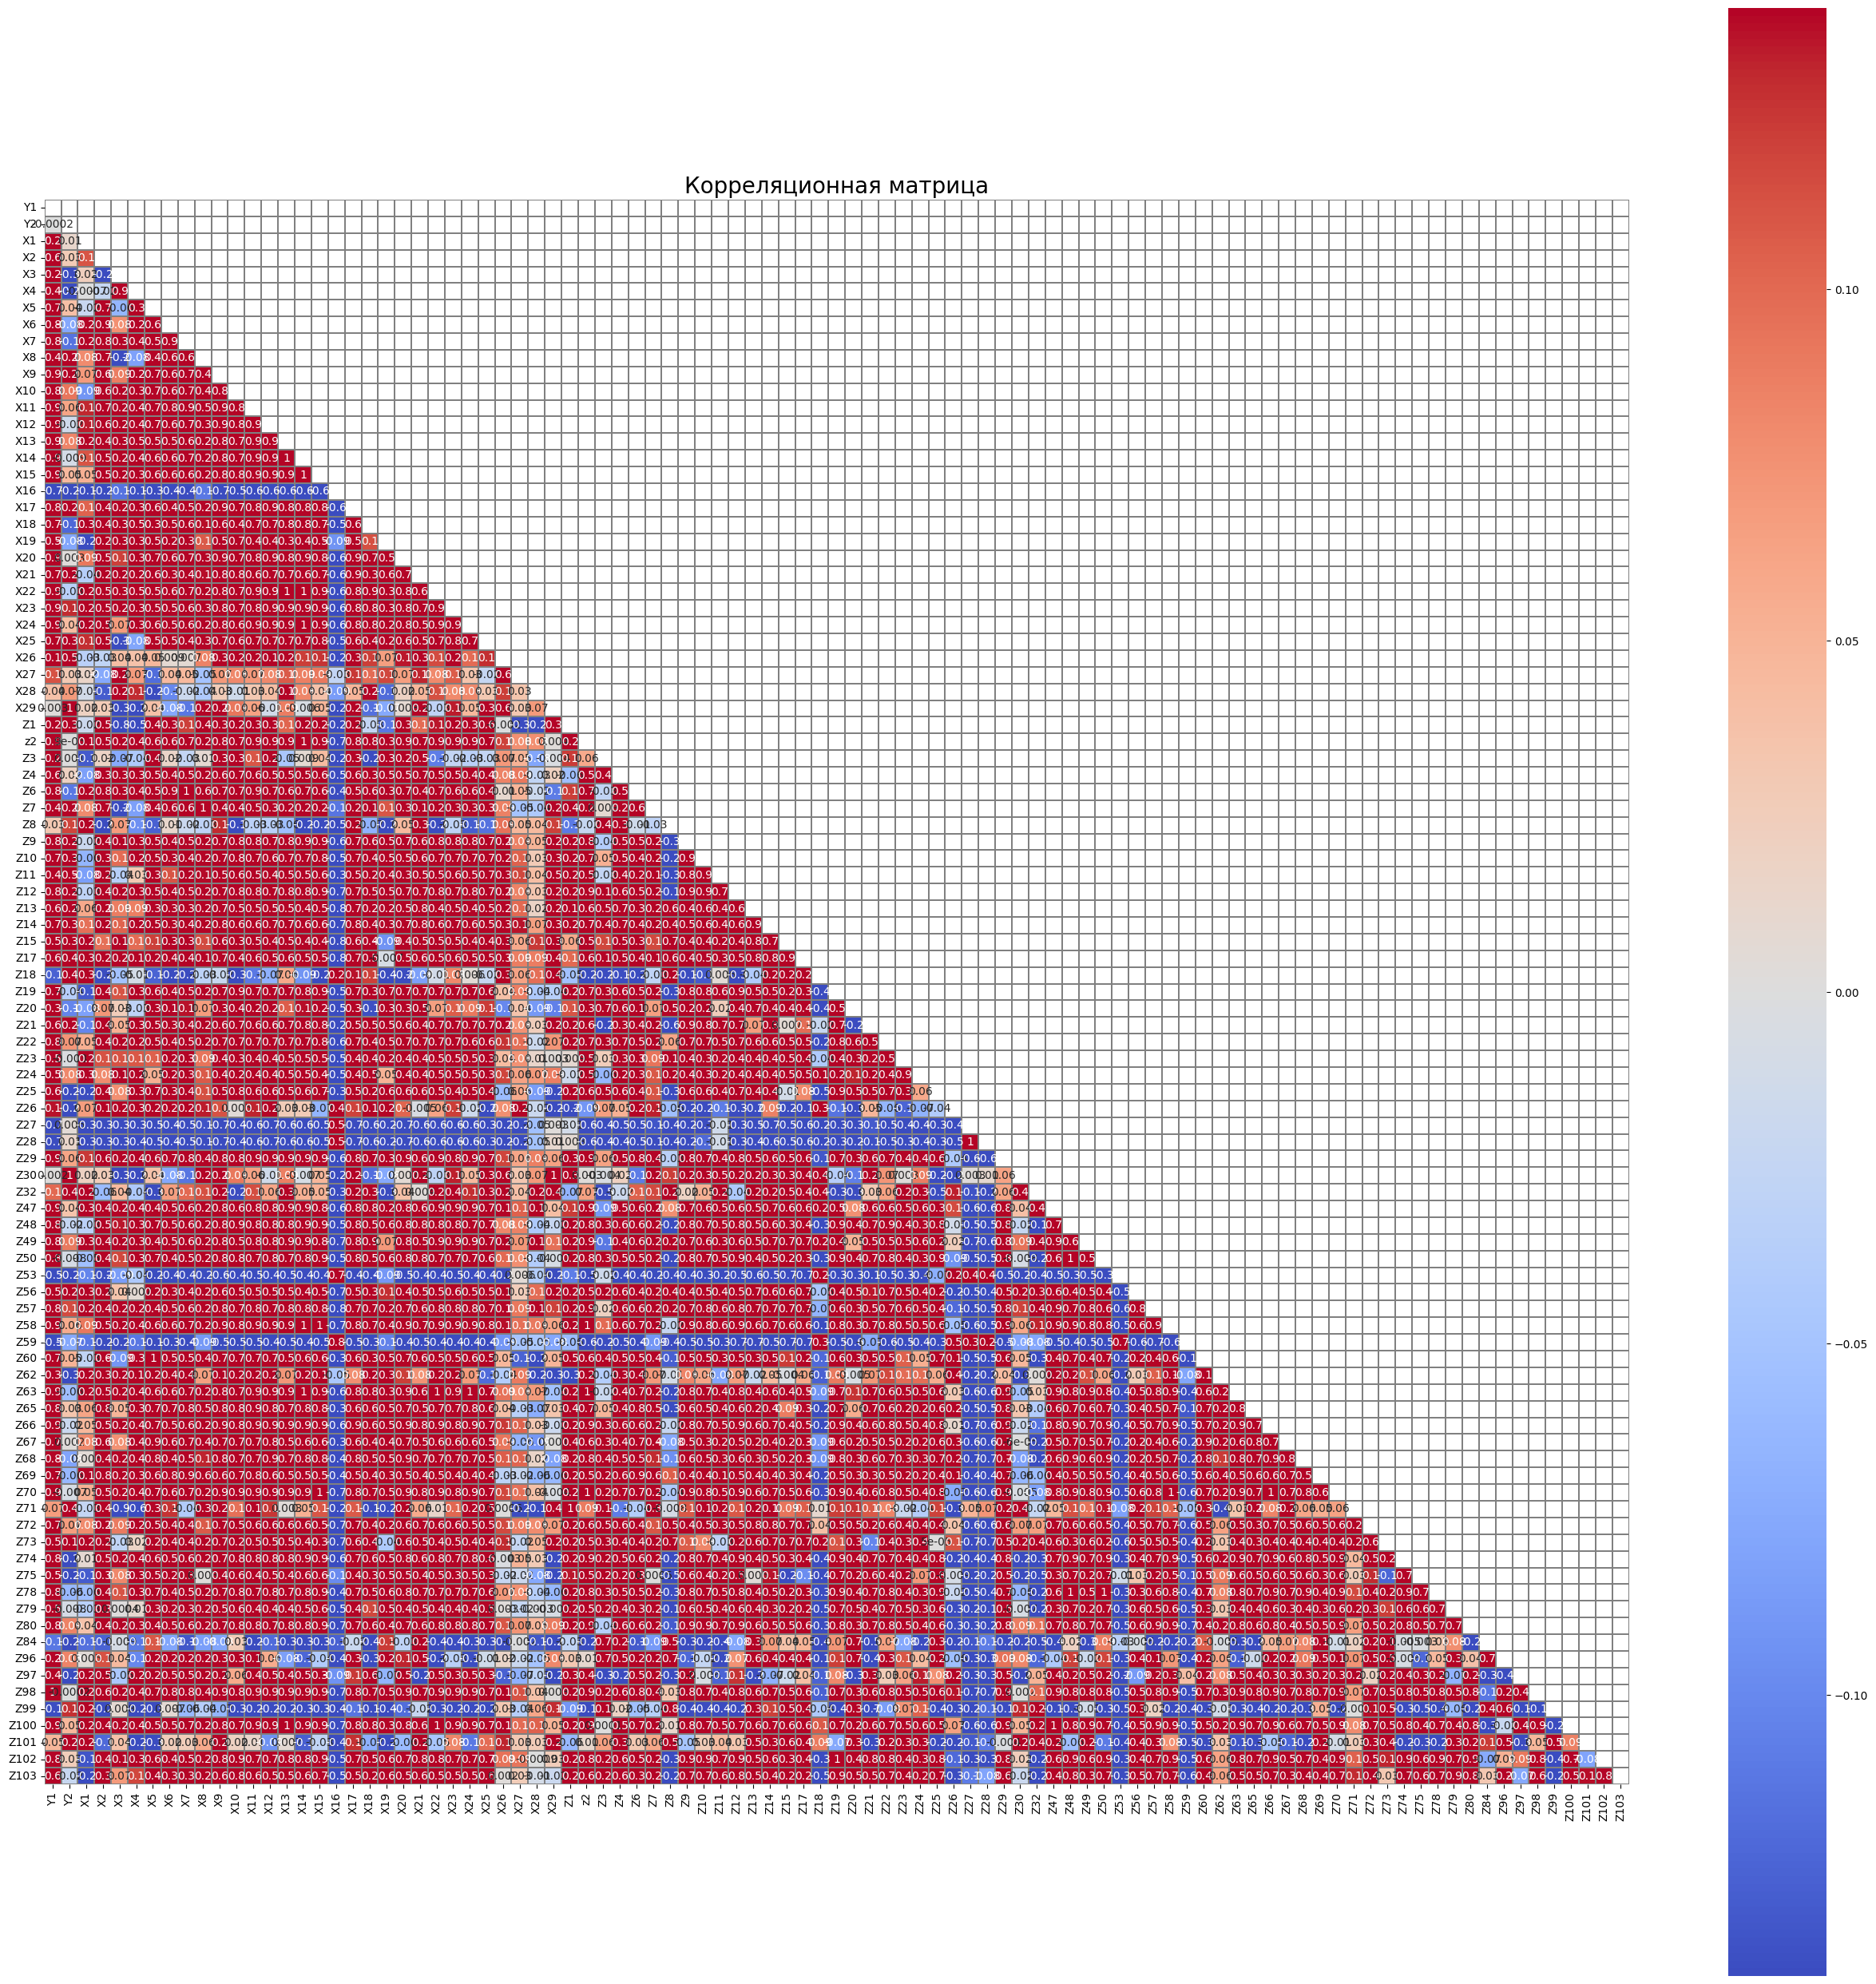

,текстовое описание,код параметра
0,"Объем ВВП, млрд рублей",Y1
1,1.3. Индекс производства продукции сельского х...,X1
2,1.4.1 Производство продуктов животноводства в ...,X2
3,1.4.2 Производство продуктов животноводства в ...,X3
4,1.4.3 Производство продуктов животноводства в ...,X4
...,...,...
128,"ВВП в текущих долларах, млрд (1 вариант)",Z99
129,Индекс МБ химии и нефтехимии,Z100
130,Объем торгов МБ химии и нефтехимии,Z101
131,Индекс металлов и добычи,Z102


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
df_base.info()
# установка первого столбца в качестве индекса
#df_base.set_index(df_base.columns[0], inplace=True)

# создание переменной с верхним треугольником корреляционной матрицы
mask_1 = np.triu(df_base.iloc[:, :].corr())
plt.figure(figsize=(32,32))
sb.heatmap(df_base.iloc[:,:].corr(),cmap='coolwarm',vmin=-0.14,vmax=0.14,center=0,square=True, annot=True, fmt='.1g', linewidths=0.05, linecolor='gray',mask=mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()
display(df_dic)


In [26]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Создаем объект subplots с несколькими графиками
fig = make_subplots(rows=len(df_base.columns), cols=1, shared_xaxes=True, subplot_titles=list(df_base.columns))

# Добавляем графики для каждого столбца
for idx, col in enumerate(df_base.columns, start=1):
    description = columns_with_description[col]
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    fig.add_trace(go.Scatter(x=df_base.index, y=df_base[col], mode='lines', name=description), row=idx, col=1)

# Обновляем заголовки графиков и оси
fig.update_layout(height=len(df_base.columns) * 300, width=2000, title_text="Интерактивный график всех параметров от времени")
fig.update_xaxes(title_text='Дата', tickformat='%Y-%m-%d')
fig.update_yaxes(title_text='Значение')

# Отображаем график
fig.show()
